In [1]:
from model import get_model

model = get_model()
display(model)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

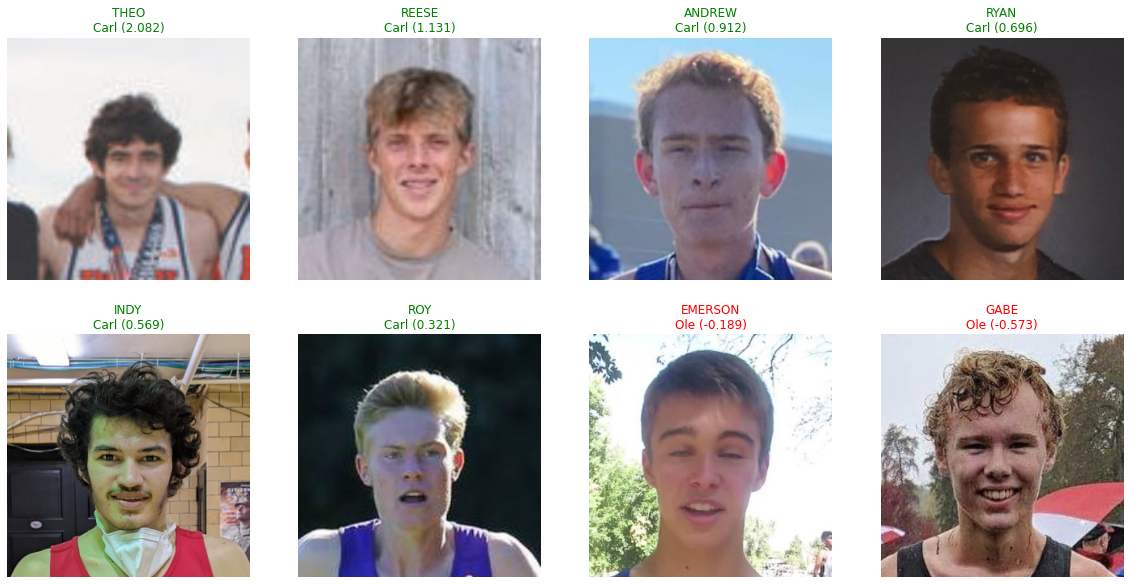

In [59]:
import os
from pathlib import Path
from face_recognition.api import load_image_file, face_encodings
import cv2
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=True)

folder = Path("freshmen")
colors = {
    "Ole": "red",
    "Carl": "green",
}


def get_info(fp: str) -> tuple:
    img = load_image_file(folder / fp)
    img = cv2.resize(img, (300, 300))
    vec = face_encodings(img, model="cnn")[0]
    score = model.decision_function(vec.reshape(1, -1))[0]

    name = fp.split(".")[0].upper()
    return score, img, name


imgs_and_scores = sorted(map(get_info, os.listdir(folder)), reverse=True)


for i, (score, img, name) in enumerate(imgs_and_scores):
    classification = "Carl" if score > 0 else "Ole"
    ax = axs.flat[i]
    ax.axis("off")
    ax.set_title(
        name + f"\n{classification} ({score:.3f})",
        color=colors[classification],
    )
    ax.imshow(img)

plt.axis("off")
# plt.tight_layout()
plt.show()
